# INFORME 3 - Rodriguez María Eugenia.

### 1. Introducción.

Debido a que las nuevas tecnologías aportan cantidades significativas de datos, se hace imperiosa la necesidad
de almacenar los mismos de manera que su acceso sea eficiente y  ́util. En general, la información de grandes
relevamientos, simulaciones numéricas, etc. está organizada en Bases de Datos. Uno de los paradigmas más
utilizado para organizar bases de datos es el de Base de Datos Relacional. En este tipo de modelo la información
se organiza en tablas, que se relacionan entre sí a partir de una propiedad de los datos. Cada tabla es un conjunto
de registros. Existen programas o sistemas de gestión de bases de datos relacionales. Entre los más conocidos, se
destacan por ejemplo MySQL, PostgreSQL, Oracle y Microsoft SQL Server. Recientemente se
desarrolló el Software SciDB, que está preparado para manipular información científica. 

Uno de los lenguajes m ́as utilizados para manipular y acceder a bases de datos es el denominado SQL (Structured
Query Languaje). Con este lenguaje se pueden crear, modificar y consultar bases de datos.

En este informe trabajamos con un cat ́alogo de exoplanetas de la base de datos exoplanets.eu, donde identificamos los elementos principales de la base de datos, como tablas, campos y registros; comprendimos el uso de las instrucciones 'select', 'from' y 'where', y corrimos varios querys analizando los datos que devuelve.

### 2. Desarrollo y resultados.

#### 2.1. Distribución de índices de masas y periodos orbitales de exoplanetas.

Estudiamos la distribución de índices de masas y periodos orbitales para exoplanetas encontrados con diferentes técnicas observacionales. Para esto corrimos un query, seleccionando de la base de datos exoplanets.eu, el nombre del objeto, el tipo de detección utilizado, su masa y periodo, y el tipo espectral de la estrella que lo alberga, con la condición de que la masa de los objetos sea menor a 15 masas de Júpiter (Mjup) de tal manera que estemos en el límite con la masa considerada de las enanas marrones, y un periodo y distancia a la estrella positivos. 


Guíandonos con el tutorial de la base de datos mencionada es como procedimos a realizar el trabajo. En referencias se encuentra el mismo (3)

In [1]:
import pyvo
service = pyvo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap")
#para conectarnos con el servidor que vamos a utilizar.

In [2]:
#extraemos los datos que necesitamos de la base de datos exoplanet.eu con las condiciones indicadas. 
query = """SELECT obs_id, detection_type, mass, period, star_spec_type, granule_uid
FROM exoplanet.epn_core 
WHERE mass<15 AND period>0 AND star_distance>0 """

In [3]:
results = service.search(query)

In [4]:
type(results)

pyvo.dal.tap.TAPResults

In [5]:
import pandas as pd

In [6]:
#transformo en tabla de astropy.
table=results.to_table() 

In [7]:
type(table)

astropy.table.table.Table

In [8]:
#transformo en DatFrame de pandas.
df=table.to_pandas()

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
#visualizamos DataFrame.
df

,obs_id,detection_type,mass,period,star_spec_type,granule_uid
0,77,Radial Velocity,9.10000,1763.300000,K0 V,14 Her b
1,309,Radial Velocity,6.90000,52596.000000,K0 V,14 Her c
2,25,Radial Velocity,0.84000,14.653140,K0IV-V,55 Cnc b
3,2428,Imaging,2.60000,10260.000000,F0IV,51 Eri b
4,12,Radial Velocity,0.47000,4.230800,G2 IV,51 Peg b
...,...,...,...,...,...,...
1144,83,Radial Velocity,12.60000,2088.330000,G0V,pi Men b
1145,6825,Primary Transit,0.01142,6.267852,G0V,pi Men c
1146,7,Radial Velocity,5.84000,3.312490,F7 V,tau Boo A b
1147,13,Radial Velocity,0.62000,4.617110,F8 V,ups And b


In [11]:
#redefinimos indice de DataFrame para no tener confusiones en futuros matcheos.
df.set_index('granule_uid', inplace=True)

In [12]:
df

,obs_id,detection_type,mass,period,star_spec_type
granule_uid,,,,,
14 Her b,77,Radial Velocity,9.10000,1763.300000,K0 V
14 Her c,309,Radial Velocity,6.90000,52596.000000,K0 V
55 Cnc b,25,Radial Velocity,0.84000,14.653140,K0IV-V
51 Eri b,2428,Imaging,2.60000,10260.000000,F0IV
51 Peg b,12,Radial Velocity,0.47000,4.230800,G2 IV
...,...,...,...,...,...
pi Men b,83,Radial Velocity,12.60000,2088.330000,G0V
pi Men c,6825,Primary Transit,0.01142,6.267852,G0V
tau Boo A b,7,Radial Velocity,5.84000,3.312490,F7 V


In [13]:
#descargamos tabla en compu. 
df.to_csv('tabla.csv')

In [14]:
#len(df) => cantidad de filas de df

In [15]:
#creamos el DataFrame indicando los nombres de las columnas y seleccionando los datos de 'df'.
matriz = pd.DataFrame(df, columns=['detection_type', 'mass','period', 'star_spec_type'])

#print(matriz) 

#extraemos cada columna de la matriz generada
columna_P = matriz['period'] 
columna_mass = matriz['mass'] 
columna_startype = matriz['star_spec_type']
columna_dectype = matriz['detection_type']


#print(columna_P.values) # mostramos los valores de la columna A


#convertimos los datos de las columnas a listas.
datos_P = list(columna_P) 
datos_mass = list(columna_mass)
datos_dectype = list(columna_dectype)

#print(datos_P) 

In [16]:
#print(datos_dectype)

Una vez obtenida la tabla pasamos a graficar la masa de los planetas en función de su periodo orbital diferenciando según la tecnica de detección. También realizamos un histograma de la masa y del periodo para observar la frecuencia de cada dato según el tipo de detección y determinar por lo tanto si existe algún tipo de sesgo en las propiedades de los exoplanetas dependiendo la herramienta de detección que se utilice. 

In [17]:
import matplotlib.pyplot as plt 

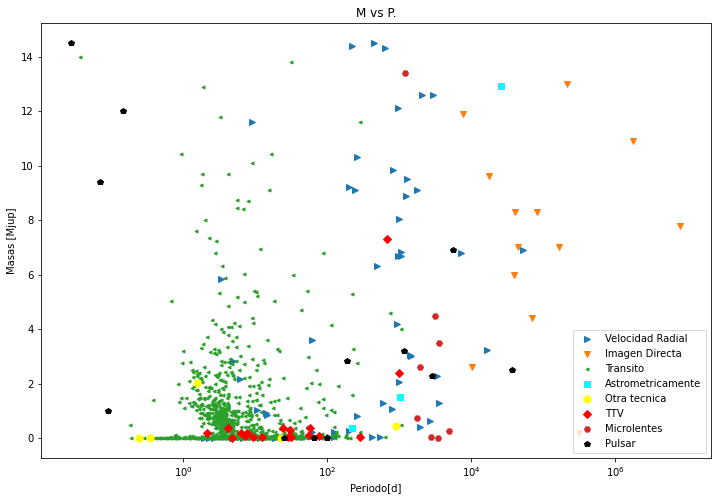

In [18]:
Dec=matriz.loc[:,'detection_type']  #toma columna de matriz etiquetada con 'detection_type'
#Dec

RV=Dec=='Radial Velocity'  #condición, true cuando es velocidad radial el tipo de detección y false cuando no lo es.
#RV 
matriz_RV=matriz.loc[RV] #toma datos de matriz donde se cumpla la condición de que el tipo de detección sea velocidad radial.
#matriz_RV

Ima=Dec=='Imaging'
matriz_Ima=matriz.loc[Ima]

PT=Dec=='Primary Transit'
matriz_PT=matriz.loc[PT]

Astrom=Dec=='Astrometry'
matriz_Astrom=matriz.loc[Astrom]

O=Dec=='Other'
matriz_O=matriz.loc[O]

TTV=Dec=='TTV'
matriz_TTV=matriz.loc[TTV]

Micro=Dec=='Microlensing'
matriz_Micro=matriz.loc[Micro]

Pul=Dec=='Pulsar'
matriz_Pul=matriz.loc[Pul]



plt.figure(figsize = (12,8))

plt.plot(matriz_RV['period'],matriz_RV['mass'],'>', label='Velocidad Radial')
plt.plot(matriz_Ima['period'],matriz_Ima['mass'],'v',label='Imagen Directa') 
plt.plot(matriz_PT['period'],matriz_PT['mass'],'<',label='Transito', markersize = 3) 
plt.plot(matriz_Astrom['period'],matriz_Astrom['mass'],'s', label='Astrometricamente', color='cyan') 
plt.plot(matriz_O['period'],matriz_O['mass'],'o',label='Otra tecnica', markersize = 7, color='yellow') 
plt.plot(matriz_TTV['period'],matriz_TTV['mass'],'D', label='TTV', color='red') 
plt.plot(matriz_Micro['period'],matriz_Micro['mass'],'H',label='Microlentes') 
plt.plot(matriz_Pul['period'],matriz_Pul['mass'],'p',label='Pulsar', color='k') 
plt.xscale('log')
plt.xlabel('Periodo[d]')
plt.ylabel('Masas [Mjup]')
plt.title('M vs P.')
plt.legend(loc='lower right',fontsize=10)

plt.show()


Con este gráfico es claro que el método más efectivo y utilizado es la técnica por transito para detectar exoplanetas. Veamos en los siguientes histograma si observamos algún sesgo de las mismas.

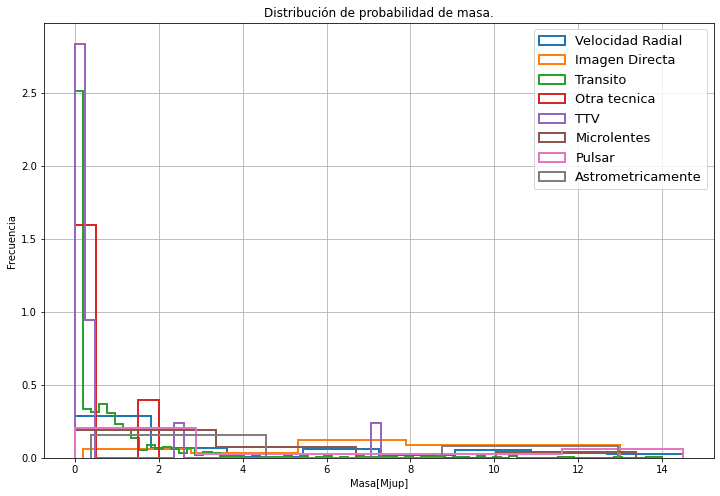

In [19]:
plt.figure(figsize = (12,8))

plt.hist(matriz_RV['mass'], bins='auto', density='true', label='Velocidad Radial', histtype='step',lw=2)
plt.hist(matriz_Ima['mass'], bins='auto', density='true', label='Imagen Directa', histtype='step',lw=2)
plt.hist(matriz_PT['mass'], bins='auto', density='true', label='Transito', histtype='step',lw=2)
plt.hist(matriz_O['mass'], bins='auto', density='true', label='Otra tecnica', histtype='step',lw=2)
plt.hist(matriz_TTV['mass'], bins='auto', density='true', label='TTV', histtype='step',lw=2)
plt.hist(matriz_Micro['mass'], bins='auto', density='true', label='Microlentes', histtype='step',lw=2)
plt.hist(matriz_Pul['mass'], bins='auto', density='true', label='Pulsar', histtype='step',lw=2)
plt.hist(matriz_Astrom['mass'], bins='auto', density='true', label='Astrometricamente', histtype='step',lw=2)
plt.title('Distribución de probabilidad de masa.')
plt.xlabel('Masa[Mjup]')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right',fontsize=13)
plt.grid()

plt.show()

In [20]:
import numpy as np

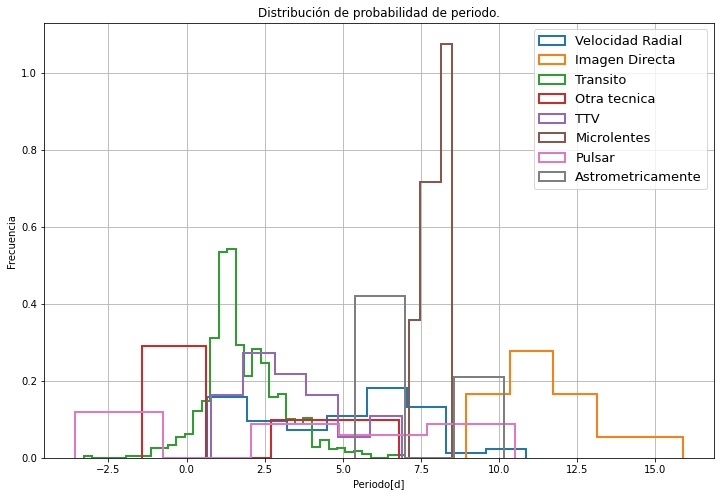

In [21]:
plt.figure(figsize = (12,8))

plt.hist(np.log(matriz_RV['period']), bins='auto', density='true', label='Velocidad Radial', histtype='step',lw=2)
plt.hist(np.log(matriz_Ima['period']), bins='auto', density='true', label='Imagen Directa', histtype='step',lw=2)
plt.hist(np.log(matriz_PT['period']), bins='auto', density='true', label='Transito', histtype='step',lw=2)
plt.hist(np.log(matriz_O['period']), bins='auto', density='true', label='Otra tecnica', histtype='step',lw=2)
plt.hist(np.log(matriz_TTV['period']), bins='auto', density='true', label='TTV', histtype='step',lw=2)
plt.hist(np.log(matriz_Micro['period']), bins='auto', density='true', label='Microlentes', histtype='step',lw=2)
plt.hist(np.log(matriz_Pul['period']), bins='auto', density='true', label='Pulsar', histtype='step',lw=2)
plt.hist(np.log(matriz_Astrom['period']), bins='auto', density='true', label='Astrometricamente', histtype='step',lw=2)
plt.title('Distribución de probabilidad de periodo.')
plt.xlabel('Periodo[d]')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right',fontsize=13)
plt.grid()

plt.show()

Observando la distribución de masas en el primer histograma vemos que las técnicas de TTV y transito tienen mayor tendencia a detectar exoplanetas con menores masas, lo cual implica un condicionamiento a los resultados de la investigación. Por otra parte, en el segundo histograma observamos que si bien cada técnica posee prioridad sobre un pequeño rango de periodo, estos rangos se distribuyen en todo el intervalo del periodo considerado, por lo tanto es aceptable el resultado de este análisis si se consideran todas las técnicas de observación utilizadas. Tener en cuenta de todas maneras que la técnica de microlentes tiene una notable frecuencia en su dado rango de periodo frente a las otras técnicas.

#### 2.2. Distribución de distancias de las estrellas con exoplanetas.

Realizamos un histograma de las distancias entre las estrellas y los exoplanetas que albergan para analizar si la distribución que siguen es consistente con una gaussiana. Para esto, como se trato en el informe 2, analizamos el $ \textit{p-value} $ utilizando la herramienta 'kstest' de 'scipy.stats' para obtenerlo y limitamos el rango de valores de 0 a 2 (AU) de tal manera que estemos usando datos precisos. 


La forma de armar el query y manipular las tablas es análoga a la usada en la sección 2.1.

In [22]:
query2 = """SELECT semi_major_axis, granule_uid
FROM exoplanet.epn_core 
WHERE mass<15 AND period>0 AND star_distance>0 """

In [23]:
results2 = service.search(query2)
table2=results2.to_table()
df2=table2.to_pandas()

In [24]:
df2

,semi_major_axis,granule_uid
0,2.84500,14 Her b
1,27.40000,14 Her c
2,0.11339,55 Cnc b
3,11.10000,51 Eri b
4,0.05200,51 Peg b
...,...,...
1144,3.30800,pi Men b
1145,0.06702,pi Men c
1146,0.04600,tau Boo A b
1147,0.05900,ups And b


In [25]:
df2.set_index('granule_uid', inplace=True)

In [26]:
df2

,semi_major_axis
granule_uid,
14 Her b,2.84500
14 Her c,27.40000
55 Cnc b,0.11339
51 Eri b,11.10000
51 Peg b,0.05200
...,...
pi Men b,3.30800
pi Men c,0.06702
tau Boo A b,0.04600


In [27]:
#matcheamos datos de tablas de sección 2.1 y 2.2 para tener en una sola.
tablafinal=pd.merge(left=df, right=df2,how='inner', on='granule_uid')

In [28]:
tablafinal

,obs_id,detection_type,mass,period,star_spec_type,semi_major_axis
granule_uid,,,,,,
14 Her b,77,Radial Velocity,9.10000,1763.300000,K0 V,2.84500
14 Her c,309,Radial Velocity,6.90000,52596.000000,K0 V,27.40000
55 Cnc b,25,Radial Velocity,0.84000,14.653140,K0IV-V,0.11339
51 Eri b,2428,Imaging,2.60000,10260.000000,F0IV,11.10000
51 Peg b,12,Radial Velocity,0.47000,4.230800,G2 IV,0.05200
...,...,...,...,...,...,...
pi Men b,83,Radial Velocity,12.60000,2088.330000,G0V,3.30800
pi Men c,6825,Primary Transit,0.01142,6.267852,G0V,0.06702
tau Boo A b,7,Radial Velocity,5.84000,3.312490,F7 V,0.04600


In [29]:
Dis=tablafinal.loc[:,'semi_major_axis']

In [30]:
#Dis

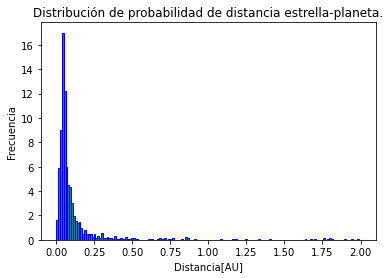

In [31]:
plt.hist(Dis,range=[0,2],bins='auto',density=True, edgecolor='blue')
plt.title('Distribución de probabilidad de distancia estrella-planeta.')
plt.xlabel('Distancia[AU]')
plt.ylabel('Frecuencia')
plt.show()

In [32]:
#eliminamos datos menores a 0 y mayores a 2 porque limitamos los valores de la distancia entre estrella y planeta al rango [0,2]
a=tablafinal['semi_major_axis'][(tablafinal['semi_major_axis']>=0) & (tablafinal['semi_major_axis']<=2)]
a

granule_uid
55 Cnc b       0.113390
51 Peg b       0.052000
55 Cnc e       0.015439
AU Mic b       0.064500
AU Mic c       0.110100
                 ...   
XO-7 b         0.044210
pi Men c       0.067020
tau Boo A b    0.046000
ups And b      0.059000
ups And c      0.861000
Name: semi_major_axis, Length: 983, dtype: float64

In [33]:
import scipy.stats as sp

In [34]:
sp.kstest(a,'norm')

KstestResult(statistic=0.5017553403698662, pvalue=1.7538230734537844e-229)

Rechazamos la hipotesis nula por ser el $ \textit{p-value} $ menor al nivel de significa $ \alpha = 0.05 $ considerado. Concluimos por lo tanto que la distribución gaussiana no representa a los datos.

#### 2.3. Correlación entre masas y radios de exoplanetas.

Por último graficamos en escalas logaritmicas el radio de los planetas en función de la masa.
Propusimos un modelo lineal que ajuste a los datos y con la herramienta 'polyfit' de 'numpy' determinamos los parámetros del mismo. Tenemos entonces que

$$ \log(R)=a\log(Mjup)+b $$
donde a y b son la pendiente y ordenada al origen, respectivamente. Renombrando a la constante b como $ b=\log(c) $, tenemos
$$ \log(R)=a\log(Mjup)+\log(c) $$
$$ \log(R)=\log(Mjup^a)+\log(c) $$
$$ \log(R)=\log(Mjup^a*c) $$
$$ R=Mjup^a*c $$
donde $$ c=10^b $$



Como se hizo anteriormente, seleccionamos de la base de datos el radio de los exoplanetas y unimos la columna al DataFrame de la sección 2.2

In [35]:
query3 = """SELECT radius, granule_uid
FROM exoplanet.epn_core 
WHERE mass<15 AND period>0 AND star_distance>0 """
results3 = service.search(query3)
table3=results3.to_table()
df3=table3.to_pandas()
df3.set_index('granule_uid', inplace=True)
tablafinal2=pd.merge(left=tablafinal, right=df3,how='inner', on='granule_uid')
tablafinal2

,obs_id,detection_type,mass,period,star_spec_type,semi_major_axis,radius
granule_uid,,,,,,,
14 Her b,77,Radial Velocity,9.10000,1763.300000,K0 V,2.84500,NaN
14 Her c,309,Radial Velocity,6.90000,52596.000000,K0 V,27.40000,NaN
55 Cnc b,25,Radial Velocity,0.84000,14.653140,K0IV-V,0.11339,NaN
51 Eri b,2428,Imaging,2.60000,10260.000000,F0IV,11.10000,1.11000
51 Peg b,12,Radial Velocity,0.47000,4.230800,G2 IV,0.05200,1.90000
...,...,...,...,...,...,...,...
pi Men b,83,Radial Velocity,12.60000,2088.330000,G0V,3.30800,NaN
pi Men c,6825,Primary Transit,0.01142,6.267852,G0V,0.06702,0.16719
tau Boo A b,7,Radial Velocity,5.84000,3.312490,F7 V,0.04600,1.06000


In [63]:
#guardamos tabla que se sube a Github.
tablafinal2.to_csv('tablafinal.csv')

Graficamos el radio en función de la masa en escalas logarítmicas.

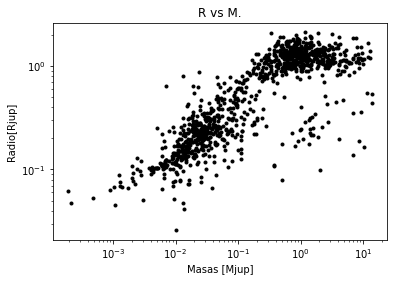

In [51]:
plt.plot(tablafinal2['mass'],tablafinal2['radius'],'o', color='k', markersize = 3) 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Masas [Mjup]')
plt.ylabel('Radio[Rjup]')
plt.title('R vs M.')

plt.show()

Eliminamos las filas de valores no determinados (NaN) para que el ajuste no presente errores y hacemos una unión de las columnas para tener un solo DataFrame de los datos que vamos a graficar. 

In [38]:
x=tablafinal2['radius'][~tablafinal2['radius'].isna()]
x

granule_uid
51 Eri b       1.11000
51 Peg b       1.90000
55 Cnc e       0.17370
AU Mic b       0.39080
AU Mic c       0.31310
                ...   
beta Pic b     1.65000
beta Pic c     1.20000
kappa And b    1.20000
pi Men c       0.16719
tau Boo A b    1.06000
Name: radius, Length: 1051, dtype: float64

In [39]:
y=tablafinal2['mass'][~tablafinal2['mass'].isna()]
y

granule_uid
14 Her b        9.10000
14 Her c        6.90000
55 Cnc b        0.84000
51 Eri b        2.60000
51 Peg b        0.47000
                 ...   
pi Men b       12.60000
pi Men c        0.01142
tau Boo A b     5.84000
ups And b       0.62000
ups And c       9.10000
Name: mass, Length: 1149, dtype: float64

In [40]:
graf= tablafinal=pd.merge(left=y, right=x,how='inner', on='granule_uid')
graf

,mass,radius
granule_uid,,
51 Eri b,2.60000,1.11000
51 Peg b,0.47000,1.90000
55 Cnc e,0.02703,0.17370
AU Mic b,0.03680,0.39080
AU Mic c,0.06980,0.31310
...,...,...
beta Pic b,11.90000,1.65000
beta Pic c,8.89000,1.20000
kappa And b,13.00000,1.20000


Con la herramienta 'polyfit' encontramos entonces los parámetros de la recta. 

In [52]:
mod=np.polyfit(np.log(graf['mass']),np.log(graf['radius']),1)
mod
pendiente=mod[0]
ordenada_al_origen=mod[1]

print('La pendiente es a=', pendiente)
print(' y la ordenada al origen esta dada por b=', ordenada_al_origen)

#mostrar que la pendiente sigue el modelo que va como m proporcional a r al cubo

La pendiente es a= 0.37771031071796707
 y la ordenada al origen esta dada por b= -0.062020909066556905


Asumiendo una densidad constante en los planetas y sabiendo que la misma se relaciona con la masa y el volumen como $ \rho= \frac{masa}{volumen}$ , es razonable el valor obtenido para la pendiente, pues $ a^{-1}=2.70 $ y tenemos que la relación de potencias entre el radio y la masa está dada por $ Mjup \propto R^3 $. 

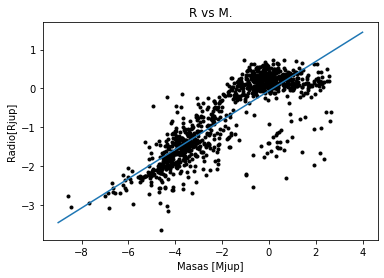

In [57]:
#ajustamos el modelo.

plt.plot(np.log(tablafinal2['mass']),np.log(tablafinal2['radius']),'o', color='k', markersize = 3) #gráfico de datos
t=np.linspace(-9,4,50)
plt.plot(t,mod[0]*t+mod[1]) #gráfico de modelo
plt.xlabel('Masas [Mjup]')
plt.ylabel('Radio[Rjup]')
plt.title('R vs M.')

plt.show()


### 3. Conclusión.

Con las herramientas utilizadas para el manejo de la base de datos logramos analizar y obtener diferentes resultados para las propiedades de los sistemas estrella-planeta. Por un lado observamos que estamos limitados instrumentalmente por las técnicas de detección, por otro lado notamos que la distribución de la distancia estrella-planeta no sigue una distribución gaussina, y finalmente, asumiendo que la densidad de los exoplanetas encontrados se mantiene constante, determinamos que la relación radio-masa sigue una ley de potencias que va como $ Mjup \propto R^3 $. 

### 4. Referencias. 

(1)Guías para Pandas: [Property DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)
;[PANDAS-manipulación de datos con Python](https://joserzapata.github.io/courses/python-ciencia-datos/pandas/)

(2)Guías para Python: [Manejo de matrices](https://www.codigopiton.com/obtener-columna-de-matriz-en-python/); [Visualización de datos con Python](https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/); [Graficar en Python con Matplotlib y NumPy](https://numython.github.io/posts/2016/02/graficar-en-python-con-matplotlib-y/)

(3)Tutorial base de datos [exoplanet.eu](http://exoplanet.eu/API/)